In [1]:
import sys
sys.path.append('../wamuu')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from time import time

from instance import Instance
from solution import Solution
from sweep import best_sweep
from metaheuristics.simulated_annealing import sa

First we choose an instance to work on

In [2]:
I = Instance(
    instance_dir='../data/raw',
    instance='n50_s01_t01_w01'
)

In [3]:
G = nx.Graph()
for i in range(I.n+1): G.add_node(i, pos=I.nodes[i])
pos = nx.get_node_attributes(G, 'pos')

In [4]:
def plot(sol=None):
    nx.draw_networkx_nodes(G, pos, nodelist=[0], node_color='#FFA726', node_size=80, node_shape='s')
    nx.draw_networkx_nodes(G, pos, nodelist=range(1, I.n+1), node_color='#BDBDBD', node_size=80)
    if sol != None:
        nx.draw_networkx_edges(G, pos,
                           edgelist=[[i, sol.node_up[i]] for i in range(1, I.n+1)],
                           edge_color=['#3E2723' if sol.node_power[i] <= I.max_cable_capacity else '#D50000' for i in range(1, I.n+1)],
                           width=[I.get_cable_index_from_node_power(sol.node_power[i])+1 for i in range(1, I.n+1)])
    nx.draw_networkx_labels(G, pos, font_size=8)
    plt.show()

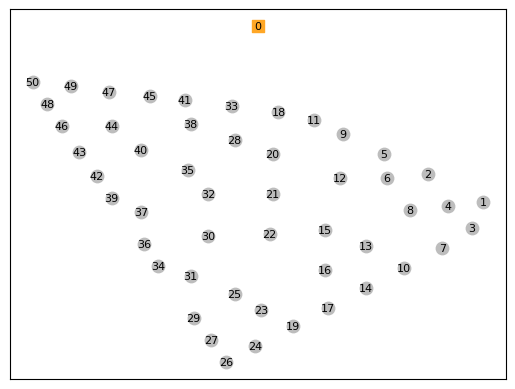

In [5]:
plot()

Let's see the best sweep with its cost

In [6]:
S0 = Solution(I, best_sweep(I))

Best sweep cost: 3.618e+07


/tmp/ipykernel_37551/1540587156.py:5: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos,


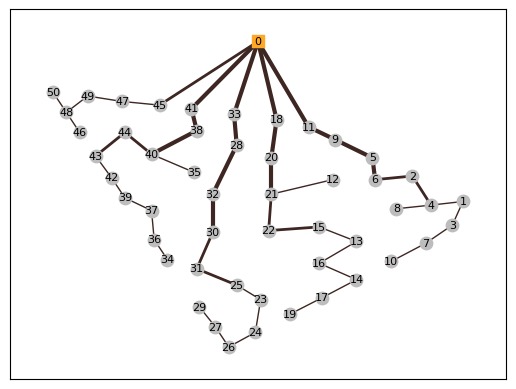

In [7]:
print(f'Best sweep cost: {S0.cost:.4}')
plot(S0)

Let's run the Simulated Annealing algorithm with different parameters

In [8]:
SA_1 = sa(I, T=1.0, alpha=0.9, tl=10*60, seed=1)

In [9]:
SA_2 = sa(I, T=1.0, alpha=0.99, tl=10*60, seed=2)

In [10]:
SA_3 = sa(I, T=1.0, alpha=0.999, tl=10*60, seed=3)

In [11]:
SA_4 = sa(I, T=1.0, alpha=0.9999, tl=10*60, seed=4)

In [12]:
SA_5 = sa(I, T=1.0, alpha=0.99999, tl=10*60, seed=5)

In [13]:
SA_6 = sa(I, T=1.0, alpha=0.999999, tl=10*60, seed=6)

In [14]:
print(f'Best sweep cost: {S0.cost:.4}')
print(f'SA_1 cost: {SA_1.cost:.4}')
print(f'SA_2 cost: {SA_2.cost:.4}')
print(f'SA_3 cost: {SA_3.cost:.4}')
print(f'SA_4 cost: {SA_4.cost:.4}')
print(f'SA_5 cost: {SA_5.cost:.4}')
print(f'SA_6 cost: {SA_6.cost:.4}')

Best sweep cost: 3.618e+07
SA_1 cost: 3.734e+07
SA_2 cost: 3.783e+07
SA_3 cost: 4.007e+07
SA_4 cost: 3.916e+07
SA_5 cost: 3.614e+07
SA_6 cost: 5.953e+07


/tmp/ipykernel_37551/1540587156.py:5: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos,


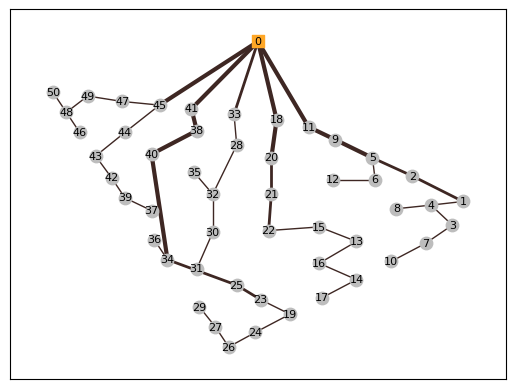

In [21]:
plot(SA_1)

/tmp/ipykernel_37551/1540587156.py:5: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos,


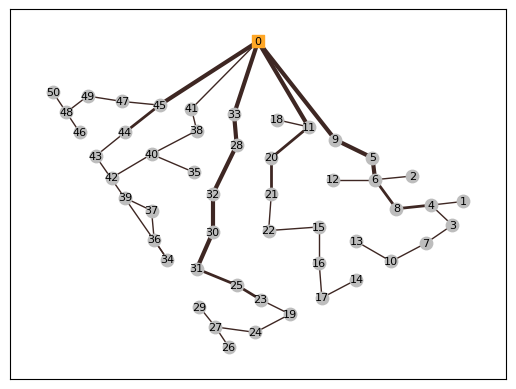

In [22]:
plot(SA_2)

/tmp/ipykernel_37551/1540587156.py:5: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos,


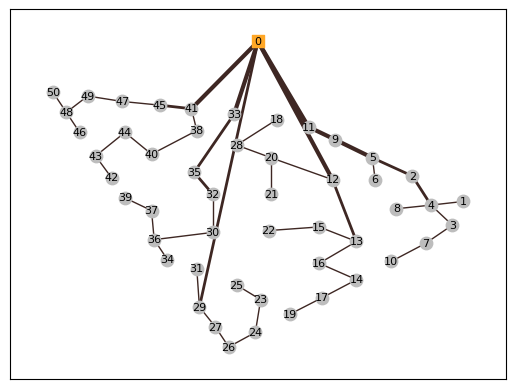

In [23]:
plot(SA_3)

/tmp/ipykernel_37551/1540587156.py:5: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos,


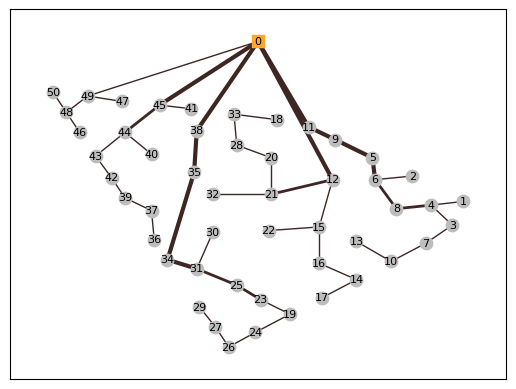

In [24]:
plot(SA_4)

/tmp/ipykernel_37551/1540587156.py:5: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos,


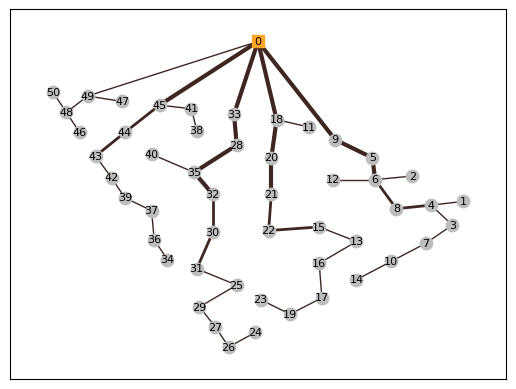

In [25]:
plot(SA_5)

/tmp/ipykernel_37551/1540587156.py:5: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos,


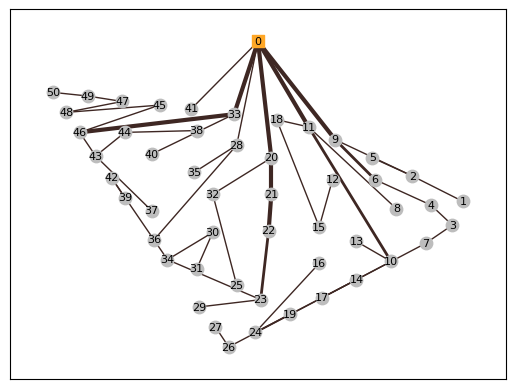

In [26]:
plot(SA_6)